# Digit Recognizer

## Machine Learning

In this notebook, I will try to use sklearn to implement machine learning in digit recognizer via two methods: SVM and K-nearest neighbors. 

---
## 1. Load The Data

In [9]:
## Load data
import csv
import numpy as np
from sklearn.model_selection import train_test_split

## define a function that translat the string into float in the array
def trans_str2int(strlist):
    intlist = []
    for i in range(len(strlist)):
        intlist.append([])
        for j in range(len(strlist[i])):
            intlist[i].append(int(strlist[i][j]))
    return list(intlist)

X_str = []
Y = []
print('Reading in the training data......')
with open('./data/train.csv') as csvfile:
    lines = csv.reader(csvfile)
    for line in lines:
        Y.append(line[0])
        image = np.array(line[1:])
        X_str.append(image)
    del X_str[0]
    del Y[0]

# print('Reading in the testing data......')
# x_test_str = []
# with open('./data/test.csv') as csvfile:
#     lines = csv.reader(csvfile)
#     for line in lines:
#         image = np.array(line)
#         x_test_str.append(image)
#     del x_test_str[0]

X = trans_str2int(X_str)
# x_test = trans_str2int(x_test_str)
# y_test = np.zeros(len(x_test))

print('Spliting the training data into training and valid......')
## split the train data into training and validation part to check the model
## validation set takes 3% data from the whole training data 
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=1)
print('Finish!')

Reading in the training data......
Spliting the training data into training and valid......
Finish!


---

## 2. Dataset Summary & Exploration

### Provide a Basic Summary of the Data Set

In [2]:
## print the size of each set
n_train = len(x_train)

## Number of validation examples
n_validation = len(x_valid)

## Number of testing examples.
# n_test = len(x_test)

## The shape of the data
image_shape = str(1) + '*' + str(len(x_train[0]))

## Numbers of unique classes/labels in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
# print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 40740
Number of validation examples = 1260
Image data shape = 1*784
Number of classes = 10


### Include an exploratory visualization of the dataset

5


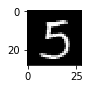

In [10]:
## Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0,len(x_train))
image = np.array(x_train[index])
image = image.reshape((28,28))

plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')
print(y_train[index])

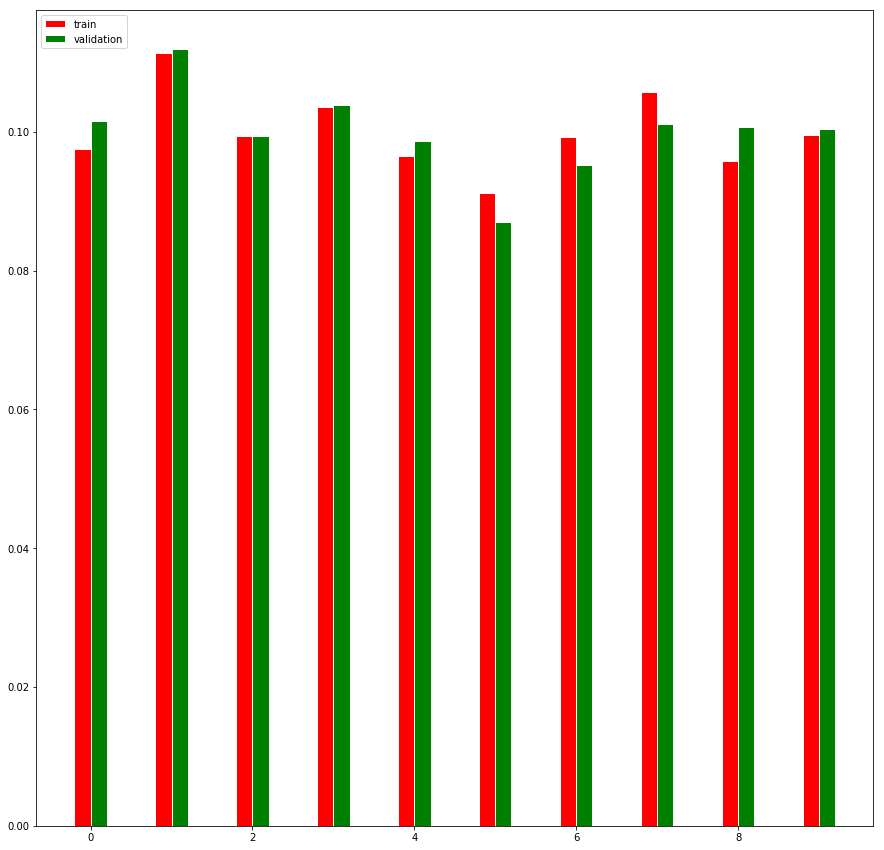

In [11]:
## show the data in picture
import copy

def datacount(data):
    number = []
    count = copy.deepcopy(data)
    count.sort()
    for i in range(9):
        a = count.index(str(i+1))-count.index(str(i))
        number.append(a)
        
    a = len(count)-count.index(str(9))
    number.append(a)
    return number

signs = np.arange(10)
plt.figure(figsize=(15,15))
percent_train = np.divide(datacount(y_train),len(y_train))
percent_valid = np.divide(datacount(y_valid),len(y_valid))
# percent_test = np.divide(datacount(y_test),len(y_test))
plt.bar(signs-0.1, percent_train, width = 0.2, fc = 'r', edgecolor = 'white', label='train', lw=1)
plt.bar(signs+0.1, percent_valid, width = 0.2, fc = 'g', edgecolor = 'white', label='validation', lw=1)
# plt.bar(signs+0.25, percent_test, width = 0.25, fc = 'b', edgecolor = 'white', label='test', lw=1)
plt.legend(loc="upper left")
# plt.savefig('./pictures/data_bar.jpg')
plt.show()

In [9]:
## show the data in table

print("{0:<3}".format("DigitName"), "{0:10}".format("  Training "),"{0:10}".format(" Validation"))
for j in range(10):
    print('   {0:<3}'.format(j),
          "{0:10.2f}%".format(percent_train[j]*100 ),"{0:10.2f}%".format(percent_valid[j]*100 ))

DigitName   Training   Validation
   0         9.84%       9.76%
   1        11.12%      12.22%
   2         9.88%      11.98%
   3        10.39%       9.44%
   4         9.69%       9.92%
   5         9.03%       9.37%
   6         9.90%       8.25%
   7        10.52%       9.13%
   8         9.69%       9.29%
   9         9.95%      10.63%


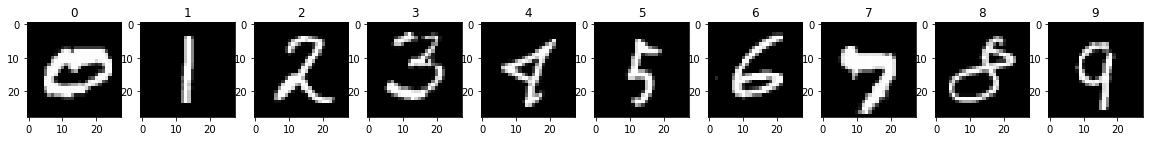

In [10]:
## visualize all the examples

fig = plt.figure(figsize=(20,20))

for i in range(10):
    y = list(y_train)
    index = y.index(str(i))
    fig.add_subplot(5,10,i+1)
    fig.add_subplot(5,10,i+1).set_title(str(i))
    plt.imshow(np.array(x_train[index]).reshape(28,28), cmap='gray')

----

## 3. Data processing

To train the codel more effectively, I will do some pre-processing (normalization).

The image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

In [12]:
## normalized the pixels
print('Normalizing the training data......')
x_train = (np.array(x_train)-128.0)/128.0
print('Normalizing in the valid data......')
x_valid = (np.array(x_valid)-128.0)/128.0
# print('Reading in the testing data......')
# x_test = (np.array(x_test)-128.0)/128.0
print('Normalizing in the whole data......')
X = (np.array(X)-128.0)/128.0
print('Finish!')

Normalizing the training data......
Normalizing in the valid data......
Normalizing in the whole data......
Finish!


----

## 4. KNN method

In [3]:
## train the model
from sklearn import neighbors
print('Training the knn classifier......')

knn = neighbors.KNeighborsClassifier(20, weights='distance') # weights raise with smaller distance
knn.fit(x_train, y_train)
score = knn.score(x_train, y_train)
print(score)

Training the knn classifier......
1.0


In [7]:
## evaluate the model

# define a function to calculate the precision, recall and F value
def precion_and_recall(prediction,proves):
    calcu = [[0,0,0,i] for i in range(10)]
    for i in range(len(prediction)):
        if proves[i] == prediction[i]:
            calcu[proves[i]][1] += 1 
        else:
            calcu[proves[i]][0] += 1
            calcu[prediction[i]][2] += 1
    ret = calcu
    for j in range(len(calcu)):
        ret[j][0] = calcu[j][1]/(calcu[j][1]+calcu[j][0])  ### precision
        ret[j][1] = calcu[j][1]/(calcu[j][1]+calcu[j][2])  ### recall
        ret[j][2] = ret[j][0]*ret[j][1]*2/(ret[j][1]+ret[j][0])  ### F
    return ret

In [11]:
valid_predict = knn.predict(x_valid)
print(knn.score(x_valid, y_valid))

# translate the str into int
number_valid = datacount(y_valid)
prove = [int(i) for i in y_valid]
predict = [int(j) for j in valid_predict]

# calculate the precision, recall and F value and sort it according to F value
pre_and_re = precion_and_recall(predict, prove)
pre_and_re.sort(key=lambda x:x[2])

0.953968253968254


In [12]:
## list the result in sheet

signames = range(10)

print("{0:<3}".format("DigitName"),  "{0:10}".format(" Precision"),"{0:10}".format("   Recall"), " {0:10}".format("     F"))
for j in range(len(pre_and_re)):
    print('   {0:<3}'.format(signames[pre_and_re[j][3]]),
      "{0:10.2f}%".format(pre_and_re[j][0]*100),"{0:10.2f}%".format(pre_and_re[j][1]*100),
      "{0:10.2f}%".format(pre_and_re[j][2]*100))

DigitName  Precision    Recall        F    
   7        95.65%      87.30%      91.29%
   9        93.28%      94.70%      93.98%
   2        91.39%      97.18%      94.20%
   8        93.16%      98.20%      95.61%
   5        94.07%      97.37%      95.69%
   4        94.40%      97.52%      95.93%
   6        98.08%      94.44%      96.23%
   0        97.56%      95.24%      96.39%
   3        96.64%      96.64%      96.64%
   1       100.00%      95.65%      97.78%


## 5. SVM Method, default kernel(rbf)

### first try gamma = 'auto' (1/n_features), C = default(1.0).

In [3]:
# train the model

from sklearn import svm

print('Training the SVM classifier......')
clf = svm.SVC()
clf.fit(x_train, y_train)
score = clf.score(x_train, y_train)
print(score)

0.971060382916053


In [11]:
## evaluate the model

valid_predict = clf.predict(x_valid)

print(clf.score(x_valid, y_valid))

# translate the str into int
number_valid = datacount(y_valid)
prove = [int(i) for i in y_valid]
predict = [int(j) for j in valid_predict]

# calculate the precision, recall and F value and sort it according to F value
pre_and_re = precion_and_recall(predict, prove)
pre_and_re.sort(key=lambda x:x[2])

0.9634920634920635


In [14]:
# list the result in sheet

print("{0:<3}".format("DigitName"),  "{0:10}".format(" Precision"),"{0:10}".format("   Recall"), " {0:10}".format("     F"))
for j in range(len(pre_and_re)):
    print('   {0:<3}'.format(signames[pre_and_re[j][3]]),
      "{0:10.2f}%".format(pre_and_re[j][0]*100),"{0:10.2f}%".format(pre_and_re[j][1]*100),
      "{0:10.2f}%".format(pre_and_re[j][2]*100))

DigitName  Precision    Recall        F    
   5        93.22%      94.83%      94.02%
   3        92.44%      95.65%      94.02%
   7        95.65%      94.02%      94.83%
   9        94.78%      96.21%      95.49%
   4        96.00%      96.00%      96.00%
   8        94.87%      97.37%      96.10%
   2        98.01%      96.73%      97.37%
   6        98.08%      97.14%      97.61%
   0        99.19%      96.83%      97.99%
   1       100.00%      98.09%      99.04%


### Parameter Tuning for SVM: Kernel, C, gamma

#### First find the best C.

In [6]:
# from sklearn import svm,  grid_search
# X = (np.array(X)-128.0)/128.0
# parameters = {'C':[1,6,11]}
# svr = svm.SVC()
# clf = grid_search.GridSearchCV(svr, parameters)
# clf.fit(X, Y)
# print(clf.best_params_)

C:\Users\Wyatt\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Wyatt\Miniconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'C': 11}


In [20]:
clf = svm.SVC(C = 11)
clf.fit(x_train, y_train)
score = clf.score(x_train, y_train)
print(score)

0.996367206676485


In [21]:
## evaluate the model

valid_predict = clf.predict(x_valid)

print(clf.score(x_valid, y_valid))

# translate the str into int
number_valid = datacount(y_valid)
prove = [int(i) for i in y_valid]
predict = [int(j) for j in valid_predict]

# calculate the precision, recall and F value and sort it according to F value
pre_and_re = precion_and_recall(predict, prove)
pre_and_re.sort(key=lambda x:x[2])

# list the result in sheet

print("{0:<3}".format("DigitName"),  "{0:10}".format(" Precision"),"{0:10}".format("   Recall"), " {0:10}".format("     F"))
for j in range(len(pre_and_re)):
    print('   {0:<3}'.format(signames[pre_and_re[j][3]]),
      "{0:10.2f}%".format(pre_and_re[j][0]*100),"{0:10.2f}%".format(pre_and_re[j][1]*100),
      "{0:10.2f}%".format(pre_and_re[j][2]*100))

0.9714285714285714
DigitName  Precision    Recall        F    
   7        95.65%      94.02%      94.83%
   4        94.40%      97.52%      95.93%
   5        94.07%      98.23%      96.10%
   9        97.01%      96.30%      96.65%
   8        95.73%      98.25%      96.97%
   2        98.01%      96.10%      97.05%
   3        97.48%      96.67%      97.07%
   0        99.19%      97.60%      98.39%
   1       100.00%      98.09%      99.04%
   6        99.04%      99.04%      99.04%


In [16]:
## select the best kernel
from sklearn import svm,  grid_search
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid' ]}
svr = svm.SVC()
clf = grid_search.GridSearchCV(svr, parameters)

print('Start tuning parameters of kernel......')

clf.fit(X, Y)
print(clf.best_params_)

Start tuning parameters of kernel......
{'kernel': 'poly'}


NameError: name 'best_estimator_' is not defined

In [17]:
best_kernel = clf.best_params_['kernel']
old_score = clf.best_estimator_.score(X,Y)
print('score: ', old_score)
print('Finish!')

score:  0.9771428571428571
Finish!


In [ ]:
## select the best parameters
## linear:     C
## polynomial: C, degree, coef0
## rbf:        C, gamma(must > 0 )
## sigmoid:    C, coef0
## see: http://scikit-learn.org/stable/modules/svm.html#svm-kernels

## already picked: 16 from 8,16,24 and 14 form 14,16,18

from sklearn import svm,  grid_search
tune_step = {'C': 1}
parameters = {'C':[13, 14, 15], 'kernel' : ['poly']}
tune_pare = 'C'
svr = svm.SVC()

old_score = 0.998
epoch = 0
while True:
    epoch += 1
    print('Epoch ', epoch)
    clf = grid_search.GridSearchCV(svr, parameters, n_jobs=3)
    clf.fit(X,Y)
    new_score = clf.best_estimator_.score(X,Y)
    print('Parameters: ', clf.best_params_)
    print('Score: ', new_score)
    if abs(new_score-old_score) > 0.05 or tune_step[tune_pare] > 1:
        print('Continue training......')
        old_score = new_score
        tune_step[tune_pare] = tune_step[tune_pare]/2
        parameters[tune_pare] = [clf.best_params_[tune_pare]-tune_step[tune_pare], 
                                 clf.best_params_[tune_pare], 
                                 clf.best_params_[tune_pare]+tune_step[tune_pare]]
    else:
        break
print('Tuning finished!')

Epoch  1
Parameters:  {'C': 15, 'kernel': 'poly'}
Score:  0.9989761904761905
Continue training......
Epoch  2


In [6]:
from sklearn import svm
clf = svm.SVC(kernel = 'poly', C = 15)
clf.fit(x_train, y_train)
score = clf.score(x_train, y_train)
print(score)

0.9990427098674521


In [10]:
valid_predict = clf.predict(x_valid)

print(clf.score(x_valid, y_valid))

# translate the str into int
number_valid = datacount(y_valid)
prove = [int(i) for i in y_valid]
predict = [int(j) for j in valid_predict]

# calculate the precision, recall and F value and sort it according to F value
pre_and_re = precion_and_recall(predict, prove)
pre_and_re.sort(key=lambda x:x[2])

# list the result in sheet

signames = range(10)

print("{0:<3}".format("DigitName"),  "{0:10}".format(" Precision"),"{0:10}".format("   Recall"), " {0:10}".format("     F"))
for j in range(len(pre_and_re)):
    print('   {0:<3}'.format(signames[pre_and_re[j][3]]),
      "{0:10.2f}%".format(pre_and_re[j][0]*100),"{0:10.2f}%".format(pre_and_re[j][1]*100),
      "{0:10.2f}%".format(pre_and_re[j][2]*100))

0.9706349206349206
DigitName  Precision    Recall        F    
   7        95.65%      94.83%      95.24%
   5        94.07%      98.23%      96.10%
   9        97.76%      94.93%      96.32%
   4        94.40%      98.33%      96.33%
   3        96.64%      96.64%      96.64%
   2        98.01%      95.48%      96.73%
   8        95.73%      98.25%      96.97%
   0        99.19%      96.83%      97.99%
   6        98.08%      99.03%      98.55%
   1       100.00%      98.72%      99.35%


In [ ]:
## tune the parameter degree
from sklearn import svm,  grid_search
tune_step = {'degree': 8}
parameters = {'C':[15], 'degree':[8, 16, 24], 'kernel' : ['poly']}
tune_pare = 'degree'
svr = svm.SVC()

old_score = 0.998
epoch = 0
while True:
    epoch += 1
    print('Epoch ', epoch)
    clf = grid_search.GridSearchCV(svr, parameters, n_jobs=3)
    clf.fit(X,Y)
    new_score = clf.best_estimator_.score(X,Y)
    print('Parameters: ', clf.best_params_)
    print('Score: ', new_score)
    if abs(new_score-old_score) > 0.05 or tune_step[tune_pare] > 1:
        print('Continue training......')
        old_score = new_score
        tune_step[tune_pare] = tune_step[tune_pare]/2
        parameters[tune_pare] = [clf.best_params_[tune_pare]-tune_step[tune_pare], 
                                 clf.best_params_[tune_pare], 
                                 clf.best_params_[tune_pare]+tune_step[tune_pare]]
    else:
        break
print('Tuning finished!')

C:\Users\Wyatt\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Wyatt\Miniconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Epoch  1
Parameters:  {'C': 15, 'degree': 8, 'kernel': 'poly'}
Score:  0.9999761904761905
Continue training......
Epoch  2
Parameters:  {'C': 15, 'degree': 12.0, 'kernel': 'poly'}
Score:  1.0
Continue training......
Epoch  3
Parameters:  {'C': 15, 'degree': 10.0, 'kernel': 'poly'}
Score:  1.0
Continue training......
Epoch  4


In [15]:
from sklearn import svm
clf = svm.SVC(kernel = 'poly', C = 15, degree = 10)
clf.fit(x_train, y_train)
score = clf.score(x_train, y_train)
print(score)

1.0


In [16]:
valid_predict = clf.predict(x_valid)

print(clf.score(x_valid, y_valid))

# translate the str into int
number_valid = datacount(y_valid)
prove = [int(i) for i in y_valid]
predict = [int(j) for j in valid_predict]

# calculate the precision, recall and F value and sort it according to F value
pre_and_re = precion_and_recall(predict, prove)
pre_and_re.sort(key=lambda x:x[2])

# list the result in sheet

signames = range(10)

print("{0:<3}".format("DigitName"),  "{0:10}".format(" Precision"),"{0:10}".format("   Recall"), " {0:10}".format("     F"))
for j in range(len(pre_and_re)):
    print('   {0:<3}'.format(signames[pre_and_re[j][3]]),
      "{0:10.2f}%".format(pre_and_re[j][0]*100),"{0:10.2f}%".format(pre_and_re[j][1]*100),
      "{0:10.2f}%".format(pre_and_re[j][2]*100))

0.9828571428571429
DigitName  Precision    Recall        F    
   9        97.51%      96.93%      97.22%
   5        97.95%      97.68%      97.81%
   2        98.32%      97.51%      97.91%
   3        97.25%      98.61%      97.92%
   4        97.95%      97.95%      97.95%
   8        97.75%      98.57%      98.16%
   7        98.47%      98.47%      98.47%
   6        98.88%      98.75%      98.81%
   0        99.06%      98.83%      98.95%
   1        99.57%      99.36%      99.47%


In [5]:
## tune the parameter coef0
from sklearn import svm,  grid_search
tune_step = {'coef0': 8}
parameters = {'C':[15], 'degree':[10], 'kernel' : ['poly'], 'coef0':[8, 16, 24]}
tune_pare = 'coef0'
svr = svm.SVC()

old_score = 0.998
epoch = 0
while True:
    epoch += 1
    print('Epoch ', epoch)
    clf = grid_search.GridSearchCV(svr, parameters, n_jobs=3)
    clf.fit(X,Y)
    new_score = clf.best_estimator_.score(X,Y)
    print('Parameters: ', clf.best_params_)
    print('Score: ', new_score)
    if new_score == 1:
        break
    if abs(new_score-old_score) > 0.05 or tune_step[tune_pare] > 1:
        print('Continue training......')
        old_score = new_score
        tune_step[tune_pare] = tune_step[tune_pare]/2
        parameters[tune_pare] = [clf.best_params_[tune_pare]-tune_step[tune_pare], 
                                 clf.best_params_[tune_pare], 
                                 clf.best_params_[tune_pare]+tune_step[tune_pare]]
    else:
        break
print('Tuning finished!')

Epoch  1


/home/dongzhen/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/dongzhen/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Parameters:  {'C': 15, 'coef0': 8, 'degree': 10, 'kernel': 'poly'}
Score:  1.0
Tuning finished!


In [13]:
from sklearn import svm
clf = svm.SVC(kernel = 'poly', C = 15, degree = 10, coef0 = 8)
clf.fit(x_train, y_train)
score = clf.score(x_train, y_train)
print(score)

1.0


In [14]:
valid_predict = clf.predict(x_valid)

print(clf.score(x_valid, y_valid))

# translate the str into int
number_valid = datacount(y_valid)
prove = [int(i) for i in y_valid]
predict = [int(j) for j in valid_predict]

# calculate the precision, recall and F value and sort it according to F value
pre_and_re = precion_and_recall(predict, prove)
pre_and_re.sort(key=lambda x:x[2])

# list the result in sheet

signames = range(10)

print("{0:<3}".format("DigitName"),  "{0:10}".format(" Precision"),"{0:10}".format("   Recall"), " {0:10}".format("     F"))
for j in range(len(pre_and_re)):
    print('   {0:<3}'.format(signames[pre_and_re[j][3]]),
      "{0:10.2f}%".format(pre_and_re[j][0]*100),"{0:10.2f}%".format(pre_and_re[j][1]*100),
      "{0:10.2f}%".format(pre_and_re[j][2]*100))

0.9721428571428572
DigitName  Precision    Recall        F    
   9        95.37%      96.75%      96.06%
   5        95.62%      96.81%      96.21%
   3        95.76%      96.76%      96.26%
   2        97.37%      96.10%      96.73%
   8        95.39%      98.29%      96.82%
   4        97.83%      95.86%      96.84%
   7        97.29%      96.84%      97.07%
   0        98.59%      98.02%      98.31%
   6        99.00%      97.90%      98.45%
   1        99.57%      98.63%      99.10%


## 6. Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
score = gnb.score(x_train, y_train)
print(score)

0.5575846833578793


In [18]:
## evaluate the model

valid_predict = gnb.predict(x_valid)

print(gnb.score(x_valid, y_valid))

# translate the str into int
number_valid = datacount(y_valid)
prove = [int(i) for i in y_valid]
predict = [int(j) for j in valid_predict]

# calculate the precision, recall and F value and sort it according to F value
pre_and_re = precion_and_recall(predict, prove)
pre_and_re.sort(key=lambda x:x[2])

0.5444444444444444


In [12]:
## list the result in sheet

signames = range(10)

print("{0:<3}".format("DigitName"),  "{0:10}".format(" Precision"),"{0:10}".format("   Recall"), " {0:10}".format("     F"))
for j in range(len(pre_and_re)):
    print('   {0:<3}'.format(signames[pre_and_re[j][3]]),
      "{0:10.2f}%".format(pre_and_re[j][0]*100),"{0:10.2f}%".format(pre_and_re[j][1]*100),
      "{0:10.2f}%".format(pre_and_re[j][2]*100))

DigitName  Precision    Recall        F    
   5         4.24%      45.45%       7.75%
   4        15.20%      79.17%      25.50%
   2        21.85%      86.84%      34.92%
   8        64.10%      27.88%      38.86%
   7        26.09%      83.33%      39.74%
   3        32.77%      65.00%      43.58%
   9        94.03%      43.00%      59.02%
   6        93.27%      52.72%      67.36%
   0        92.68%      69.51%      79.44%
   1        96.10%      81.77%      88.36%


## 7. Descision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
score = tree.score(x_train, y_train)
print(score)

1.0


In [17]:
## evaluate the model

valid_predict = tree.predict(x_valid)

print(tree.score(x_valid, y_valid))

# translate the str into int
number_valid = datacount(y_valid)
prove = [int(i) for i in y_valid]
predict = [int(j) for j in valid_predict]

# calculate the precision, recall and F value and sort it according to F value
pre_and_re = precion_and_recall(predict, prove)
pre_and_re.sort(key=lambda x:x[2])

0.861904761904762


In [16]:
## list the result in sheet

signames = range(10)

print("{0:<3}".format("DigitName"),  "{0:10}".format(" Precision"),"{0:10}".format("   Recall"), " {0:10}".format("     F"))
for j in range(len(pre_and_re)):
    print('   {0:<3}'.format(signames[pre_and_re[j][3]]),
      "{0:10.2f}%".format(pre_and_re[j][0]*100),"{0:10.2f}%".format(pre_and_re[j][1]*100),
      "{0:10.2f}%".format(pre_and_re[j][2]*100))

DigitName  Precision    Recall        F    
   8        77.78%      79.13%      78.45%
   5        78.81%      80.17%      79.49%
   3        78.15%      81.58%      79.83%
   7        86.96%      84.03%      85.47%
   6        86.54%      86.54%      86.54%
   2        88.08%      85.81%      86.93%
   9        85.07%      89.06%      87.02%
   4        88.00%      88.00%      88.00%
   0        95.93%      88.72%      92.19%
   1        93.51%      95.36%      94.43%


In [ ]:
## start tuning
## see: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

## select the best parameters
## criterion: gini, entropy
## splitter: best, random
## max_depth: int or None
## min_samples_split: int, float, optional (default=2)
## min_samples_leaf: int, float, optional (default=1)
## min_weight_fraction_leaf : float, optional (default=0.)
## max_features : int, float, auto, sqrt, log2, Nones